In [1]:
import pandas as pd 
import numpy as np 
#import matplotlib.pyplot as plt 
#import seaborn as sns 
import re 
#%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")
#plt.style.use('ggplot')

import nltk
from nltk import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
#from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import xgboost as xgb
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
import time

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.layers import Embedding

In [3]:
df = pd.read_csv('C:\\Users\\zba19\\Documents\\Python Scripts\\nlp\\amazon\\Reviews.csv')
pd.set_option('display.max_colwidth', None)

In [4]:
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch."


In [5]:
df.shape

(568454, 10)

In [6]:
df = df.sample(frac= 0.20, random_state=123).reset_index(drop = True)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,277536,B000VK8AVK,AVP3I6MPAICQG,"Janae Stevens ""janaedawn""",0,0,5,1253318400,Healthy yum.,I love these chips! They always make a great healthy snack when I'm stuck at work with just the vending machine for sustenance.
1,253902,B003VKR0EU,A22PDXVQMNCDLB,UmitoYama,1,1,2,1299110400,Crappy packaging. Formula is decent I suppose.,"To add to the pile-on, really really hate the new packaging. Saw the reviews here and thought ""Come on people, it's just a package,"" but then when we actually had to deal with it (after having used the good ole fashioned big round canister). No, it's not world ending, but it's just unnecessary annoyance that you don't need when you're low on sleep and changing poop-filled diapers all day. I suppose on the bright side, the new packaging likely helped to justify the continued employment of a few folks in Enfamil's Brand Marketing department (""Based on our focus group testing, modernizing our packaging will boost sales by .14%!""). In this tough job market, I say good on 'em.<br /><br />As for the formula itself, well, it's formula. Our baby drinks this just the same as if she were drinking generic Costco formula. We put out the extra cash because this mixed better (i.e., it doesn't clump), but the annoyance factor of the new Enfamil packaging actually made us start considering alternatives. Then we saw an article today on Huffpost about infants in China developing breasts because of hormones in formula. It also mentioned the lack of regulation in the US on using milk or milk products (e.g., formula) from cows that have been injected with growth hormones. That was enough for me. Organic formula it is.<br /><br />Ciao Enfamil."
2,495521,B001EQ554K,A31XUUU841Y5DX,David Hochstein,1,1,5,1265760000,OMG,This stuff is the best. I put it on just about everything. Added to homemade gravy ... you have no idea.
3,373116,B000VDN1AM,A21EF5RAKR8SDY,somedude,0,0,5,1275782400,Tulsi tea is the best tea!,"Organic India Tulsi tea is, to me, the absolute best tea I've ever had...both in terms of taste and effects. I have tried several types and have found that I enjoy Chai Masala and India breakfast the most (I enjoy them separately, but also, 1 bag of India breakfast and 1 of bag of Chai Masala makes a perfect iced chai.)<br /><br />Black tea will give most anyone an energy boost, but Tulsi tea is unique to me in that it truly does (as the manufacturers claim) leave one feeling both energized and relaxed (perhaps ""centered"" or ""focused"" would be the best word). Tack onto that the purported health benefits of tulsi, and you've got yourself one fantastic tea!<br /><br />There are a number of non-tulsi teas I enjoy, but Organic India's Tulsi Tea is the only tea I purchase on a consistent basis and that I always have on hand. Also, it is the one type of tea I am frequently recommending to friends and family. Give it a try!"
4,547018,B0018CLUP8,AGZP148TCKDKD,Zak,2,2,5,1304899200,Great dog food,"I have a German Shorthaired Pointer (3 yrs old) and a Lab mix (12 yrs old) and this food is great for both of them. I have heard vets compare this food to a Science Diet or better and it's much less expensive. Great food, great quality, the dogs love it."


In [7]:
df.shape

(113691, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113691 entries, 0 to 113690
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      113691 non-null  int64 
 1   ProductId               113691 non-null  object
 2   UserId                  113691 non-null  object
 3   ProfileName             113687 non-null  object
 4   HelpfulnessNumerator    113691 non-null  int64 
 5   HelpfulnessDenominator  113691 non-null  int64 
 6   Score                   113691 non-null  int64 
 7   Time                    113691 non-null  int64 
 8   Summary                 113687 non-null  object
 9   Text                    113691 non-null  object
dtypes: int64(5), object(5)
memory usage: 8.7+ MB


In [9]:
df.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               4
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   4
Text                      0
dtype: int64

In [10]:
df.dropna(inplace= True)

In [11]:
df.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

What is the distribution of ratings across dataset

In [12]:
rating_pct = df['Score'].value_counts()/len(df) * 100
rating_pct

5    63.791420
4    14.183299
1     9.213339
3     7.533228
2     5.278714
Name: Score, dtype: float64

In [13]:
#rating_pct.plot.bar()
#plt.show()

In [14]:
#words per review
plt.figure(figsize = (14,6))
WordsPerReview = df['Text'].apply(lambda x: len(x.split(' ')))

sns.histplot(WordsPerReview,bins = 100)

plt.xlabel('Review Length')
plt.show()

NameError: name 'plt' is not defined

#### Data Preprocessing and Transformation

In [15]:
df = pd.DataFrame(df,columns = ['Score','Text'])
df.rename(columns = {'Score':'Rating','Text':'Review'},inplace = True)

In [16]:
def apply_sentiment(Rating):
    if(Rating <=2):
        return 0
    elif(Rating>3):
        return 1
    else:
        return 2

In [17]:
df['Sentiment'] = df['Rating'].apply(apply_sentiment)
df.drop(['Rating'],axis = 1, inplace = True)

In [18]:
sentiment = df['Sentiment'].value_counts()
sentiment

1    88644
0    16475
2     8564
Name: Sentiment, dtype: int64

In [19]:
df=df[(df['Sentiment']==0) | (df['Sentiment']==1)]

In [20]:
plt.figure(figsize = ( 10,8))
sns.countplot(data = df, x = 'Sentiment')
plt.show()

NameError: name 'plt' is not defined

In [21]:
def clean_text(Review):
   
    Review = str(Review).lower() # convert to lowercase
    Review = re.sub('\[.*?\]', '', Review) 
    Review = re.sub('https?://\S+|www\.\S+', '', Review) # Remove URls
    Review = re.sub('<.*?>+', '', Review)
    Review = re.sub(r'[^a-z0-9\s]', '', Review) # Remove punctuation
    Review = re.sub('\n', '', Review)
    Review = re.sub('\w*\d\w*', '', Review)
    return Review


In [22]:
df['Review'] = df['Review'].apply(clean_text)

In [23]:
df.head()

,Review,Sentiment
0,i love these chips they always make a great healthy snack when im stuck at work with just the vending machine for sustenance,1
1,to add to the pileon really really hate the new packaging saw the reviews here and thought come on people its just a package but then when we actually had to deal with it after having used the good ole fashioned big round canister no its not world ending but its just unnecessary annoyance that you dont need when youre low on sleep and changing poopfilled diapers all day i suppose on the bright side the new packaging likely helped to justify the continued employment of a few folks in enfamils brand marketing department based on our focus group testing modernizing our packaging will boost sales by in this tough job market i say good on emas for the formula itself well its formula our baby drinks this just the same as if she were drinking generic costco formula we put out the extra cash because this mixed better ie it doesnt clump but the annoyance factor of the new enfamil packaging actually made us start considering alternatives then we saw an article today on huffpost about infants in china developing breasts because of hormones in formula it also mentioned the lack of regulation in the us on using milk or milk products eg formula from cows that have been injected with growth hormones that was enough for me organic formula it isciao enfamil,0
2,this stuff is the best i put it on just about everything added to homemade gravy you have no idea,1
3,organic india tulsi tea is to me the absolute best tea ive ever hadboth in terms of taste and effects i have tried several types and have found that i enjoy chai masala and india breakfast the most i enjoy them separately but also bag of india breakfast and of bag of chai masala makes a perfect iced chaiblack tea will give most anyone an energy boost but tulsi tea is unique to me in that it truly does as the manufacturers claim leave one feeling both energized and relaxed perhaps centered or focused would be the best word tack onto that the purported health benefits of tulsi and youve got yourself one fantastic teathere are a number of nontulsi teas i enjoy but organic indias tulsi tea is the only tea i purchase on a consistent basis and that i always have on hand also it is the one type of tea i am frequently recommending to friends and family give it a try,1
4,i have a german shorthaired pointer yrs old and a lab mix yrs old and this food is great for both of them i have heard vets compare this food to a science diet or better and its much less expensive great food great quality the dogs love it,1


In [24]:
from nltk.corpus import stopwords, words
nltk.download('stopwords')
nltk.download('words')
nltk.download('punkt')

#stop_words = set(stopwords.words('english'))
#words = nltk.word_tokenize(sentence)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zba19\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\zba19\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zba19\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [25]:
stop_words = stopwords.words('english')
stop_words.remove('no')
stop_words.remove('not')

In [26]:
def remove_stopword(sentence, stop_words=stop_words):
    tlist=sentence.split()
    tlist=[k for k in tlist if k not in stop_words]
    #return [word for word in nltk.word_tokenize(sentence) if word not in stop_words]
    return ' '.join(tlist)

df['reviews_text'] = df['Review'].apply(remove_stopword)


In [27]:
df.head()

,Review,Sentiment,reviews_text
0,i love these chips they always make a great healthy snack when im stuck at work with just the vending machine for sustenance,1,love chips always make great healthy snack im stuck work vending machine sustenance
1,to add to the pileon really really hate the new packaging saw the reviews here and thought come on people its just a package but then when we actually had to deal with it after having used the good ole fashioned big round canister no its not world ending but its just unnecessary annoyance that you dont need when youre low on sleep and changing poopfilled diapers all day i suppose on the bright side the new packaging likely helped to justify the continued employment of a few folks in enfamils brand marketing department based on our focus group testing modernizing our packaging will boost sales by in this tough job market i say good on emas for the formula itself well its formula our baby drinks this just the same as if she were drinking generic costco formula we put out the extra cash because this mixed better ie it doesnt clump but the annoyance factor of the new enfamil packaging actually made us start considering alternatives then we saw an article today on huffpost about infants in china developing breasts because of hormones in formula it also mentioned the lack of regulation in the us on using milk or milk products eg formula from cows that have been injected with growth hormones that was enough for me organic formula it isciao enfamil,0,add pileon really really hate new packaging saw reviews thought come people package actually deal used good ole fashioned big round canister no not world ending unnecessary annoyance dont need youre low sleep changing poopfilled diapers day suppose bright side new packaging likely helped justify continued employment folks enfamils brand marketing department based focus group testing modernizing packaging boost sales tough job market say good emas formula well formula baby drinks drinking generic costco formula put extra cash mixed better ie doesnt clump annoyance factor new enfamil packaging actually made us start considering alternatives saw article today huffpost infants china developing breasts hormones formula also mentioned lack regulation us using milk milk products eg formula cows injected growth hormones enough organic formula isciao enfamil
2,this stuff is the best i put it on just about everything added to homemade gravy you have no idea,1,stuff best put everything added homemade gravy no idea
3,organic india tulsi tea is to me the absolute best tea ive ever hadboth in terms of taste and effects i have tried several types and have found that i enjoy chai masala and india breakfast the most i enjoy them separately but also bag of india breakfast and of bag of chai masala makes a perfect iced chaiblack tea will give most anyone an energy boost but tulsi tea is unique to me in that it truly does as the manufacturers claim leave one feeling both energized and relaxed perhaps centered or focused would be the best word tack onto that the purported health benefits of tulsi and youve got yourself one fantastic teathere are a number of nontulsi teas i enjoy but organic indias tulsi tea is the only tea i purchase on a consistent basis and that i always have on hand also it is the one type of tea i am frequently recommending to friends and family give it a try,1,organic india tulsi tea absolute best tea ive ever hadboth terms taste effects tried several types found enjoy chai masala india breakfast enjoy separately also bag india breakfast bag chai masala makes perfect iced chaiblack tea give anyone energy boost tulsi tea unique truly manufacturers claim leave one feeling energized relaxed perhaps centered focused would best word tack onto purported health benefits tulsi youve got one fantastic teathere number nontulsi teas enjoy organic indias tulsi tea tea purchase consistent basis always hand also one type tea frequently recommending friends fam

## drop messages too short

In [28]:
idx=df.loc[df["reviews_text"].apply(lambda x: len(x.split())<2)].index
display(df.loc[idx])

,Review,Sentiment,reviews_text
4987,,1,
74702,,1,
95798,,1,
104609,yummy,1,yummy


In [29]:
df.drop(index=idx, inplace=True)

In [30]:
df.shape

(105115, 3)

## check duplicated messages

In [31]:
df.duplicated(keep=False).any()

True

In [32]:
df[df.duplicated(keep=False)]


,Review,Sentiment,reviews_text
0,i love these chips they always make a great healthy snack when im stuck at work with just the vending machine for sustenance,1,love chips always make great healthy snack im stuck work vending machine sustenance
6,be prepared for visitors the decadent aroma of chocolate raspberry truffle imbues your kitchen or office as you brew this light roast from van houtte we brewed a couple cups at the office in a cubicle and the rich aroma carried through the office air vents attracting droopyeyed coworkers in search of chocolatedelicate for a flavored coffee this blend made a delicious afternoon treat and amazingly the artificial flavoring doesnt leave a strong chemical aftertaste the smell of rich chocolate and raspberries lingers after the last sip giving the impression that a team of chocolatiers just departed honestly is heady stuffwe tested and enjoyed van houtte chocolate raspberry truffle both on keurigs small cup oz and small mug oz settings according to the van houtte website the size makes the ideal cup of coffee but you can vary the cup size if you want to change the coffees strength for example choose a larger cup size to get a less intense cup of coffeeif you are concerned about freshness our box of cups came with an expiration date of july or more than six months from our purchase daterating five stars,1,prepared visitors decadent aroma chocolate raspberry truffle imbues kitchen office brew light roast van houtte brewed couple cups office cubicle rich aroma carried office air vents attracting droopyeyed coworkers search chocolatedelicate flavored coffee blend made delicious afternoon treat amazingly artificial flavoring doesnt leave strong chemical aftertaste smell rich chocolate raspberries lingers last sip giving impression team chocolatiers departed honestly heady stuffwe tested enjoyed van houtte chocolate raspberry truffle keurigs small cup oz small mug oz settings according van houtte website size makes ideal cup coffee vary cup size want change coffees strength example choose larger cup size get less intense cup coffeeif concerned freshness box cups came expiration date july six months purchase daterating five stars
19,since we got our keurigwe have been trying different flavors and brands of coffeeteahot chocolateand cider out of all the coffee brands i have to say that green mountain far surpasses all the other brands that we have tried great taste and not so expensive that it hurts the budget,1,since got keurigwe trying different flavors brands coffeeteahot chocolateand cider coffee brands say green mountain far surpasses brands tried great taste not expensive hurts budget
20,bought a sample pack today of the jamaica me crazy and love the flavor the flavor is not too powerful nor was it overwhelming id recommend the wolf gang puck kcups,1,bought sample pack today jamaica crazy love flavor flavor not powerful overwhelming id recommend wolf gang puck kcups
26,my cat is picky especially when it comes to dry food she will happily go days refusing to eat anything if i push a kibble she doesnt like on her damn torties i switched my cat from friskies to hills scienc diet when she grew to adulthood then i decided to try one of those natural diets with no fillers and only uses real meats and blah blah blah one she wouldnt go near and the other she would eat reluctantly except the super active petite tortie grew to just over ten pounds waddled when she walked because she was horribly obese and slept hours a day waking up only to eat and her coat was staritng ot lose its shine that scared the hell out of me so i switched back to hills with a week she was starting to show interest in toys again and was already starting to lose that swaying flabby fat belly now shes back down to and very active healthy and happy i will never switch her food again,1,cat picky especially comes dry food happily go days refusing eat anything push kibble doesnt like damn torties switched cat friskies hills scienc d

In [33]:
df.drop_duplicates(inplace=True)
df.shape

(90734, 3)

## Number of non-english words

In [34]:
from nltk.stem.snowball import SnowballStemmer
en_words=set(words.words())
stemmer=SnowballStemmer('english')
stem_words=set([stemmer.stem(k) for k in en_words])
len(stem_words)

174345

In [35]:
def nonen_catch(text, en_stemmer=stemmer, stem_en=stem_words):
    nonen_list=[k for k in word_tokenize(text) if en_stemmer.stem(k) not in stem_en]
    return nonen_list

In [36]:
df['nonen']=df['reviews_text'].apply(nonen_catch)

In [37]:
df['nonen_prop']=df.apply(lambda row: len(set(row['nonen']))/len(set(row['reviews_text'].split())), axis=1)
df['nonen_prop'].hist()

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

In [38]:
#pd.set_option('display.max_colwidth', None)
df.loc[df['nonen_prop']>.6]

,Review,Sentiment,reviews_text,nonen,nonen_prop
10273,me dieron dos cajas cuando nacioacute mi hija y yo simplemente no confiaba mucho en el tema pero es absolutamente maravilloso de efecto raacutepido mucho maacutes que el motilium y son de gran eficienciamuy recomendado para quieacuten necesite producir maacutes leche,1,dieron dos cajas cuando nacioacute mi hija yo simplemente no confiaba mucho en el tema pero es absolutamente maravilloso de efecto raacutepido mucho maacutes que el motilium son de gran eficienciamuy recomendado para quieacuten necesite producir maacutes leche,"[dieron, cajas, cuando, nacioacute, hija, simplemente, confiaba, mucho, pero, absolutamente, maravilloso, efecto, raacutepido, mucho, maacutes, que, motilium, gran, eficienciamuy, recomendado, quieacuten, necesite, producir, maacutes]",0.647059
15753,este condimento te saca de apuros y es muy bueno porque realmente es ajo deshidratado no es polvo las alitas de pollo con esto y salsa barbacue quedan excelentes igual que el pollo a la parrilla,1,este condimento te saca de apuros es muy bueno porque realmente es ajo deshidratado no es polvo las alitas de pollo con esto salsa barbacue quedan excelentes igual que el pollo la parrilla,"[este, condimento, apuros, muy, bueno, porque, realmente, ajo, deshidratado, polvo, alitas, pollo, esto, salsa, barbacue, quedan, igual, que, pollo, parrilla]",0.655172
16448,we like plockysthey like usplockys plockysmean no fusstaste so goodand healthy tooplockys plockysgrab a bag or twothank you plockys,1,like plockysthey like usplockys plockysmean no fusstaste goodand healthy tooplockys plockysgrab bag twothank plockys,"[plockysthey, usplockys, plockysmean, fusstaste, goodand, tooplockys, plockysgrab, twothank, plockys]",0.692308
16622,schultz all purpose cibi vegetariani piugrave fl oz un ottimo prodotto per nutrire con equilibrio le piante in vasola crescita delle piante egrave piugrave velocele foglie saranno di un bellissimo verdela pianta risulteragrave piugrave sana,1,schultz purpose cibi vegetariani piugrave fl oz un ottimo prodotto per nutrire con equilibrio le piante vasola crescita delle piante egrave piugrave velocele foglie saranno di un bellissimo verdela pianta risulteragrave piugrave sana,"[schultz, cibi, vegetariani, piugrave, fl, oz, ottimo, prodotto, nutrire, le, piante, vasola, crescita, piante, egrave, piugrave, velocele, foglie, saranno, bellissimo, verdela, pianta, risulteragrave, piugrave, sana]",0.758621
33998,sehr gutes produkt sehr gute ware und scnelle lieferung wie immer uumlber amazoncom alles bestens und gerne wieder danke dafuumlr,1,sehr gutes produkt sehr gute ware und scnelle lieferung wie immer uumlber amazoncom alles bestens und gerne wieder danke dafuumlr,"[sehr, gutes, produkt, sehr, gute, scnelle, lieferung, wie, immer, uumlber, amazoncom, bestens, gerne, wieder, dafuumlr]",0.777778
36801,delicious and nutritious delicius nd nutritius delicous an nutritous delcious ad nutrtious dlicious n nutrious dellicious anld nutritilous deliciouss ands nutritiouss,1,delicious nutritious delicius nd nutritius delicous nutritous delcious ad nutrtious dlicious n nutrious dellicious anld nutritilous deliciouss ands nutritiouss,"[delicius, nd, nutritius, delcious, nutrtious, dlicious, nutrious, dellicious, anld, nutritilous, deliciouss, nutritiouss]",0.631579
43815,first you take the peanutsand you crunch emyou crunch emfirst you take the peanutsand you crunch emyou crunch emfor your peanut peanut butterand jellypeanut peanut butterand jellythen you take the grapesand you squish emyou squish emthen you take the grapesand you squish emyou squish emfor your peanut peanut butterand jellypeanut peanut butterand jellythen you take the breadand you spread ityou spread itthen you take the breadand you spread ityou spread itfor your peanut peanut butterand jellypeanut peanut butterand jellythen you take your sandwichand you eat ityou eat itthen you take your sandwichand you eat ityou eat itcause its good peanut

In [39]:
df=df[df['nonen_prop']<=.6]

In [40]:
df.shape

(90715, 5)

## Glove Embedding

In [41]:
X=df['reviews_text'].tolist()
y=df["Sentiment"]

In [42]:
train_text=X[0:63500]
train_label=y[0:63500]
test_text=X[63500:]
test_label=y[63500:]

In [43]:
path_to_glove_file = "C:\\Users\\zba19\\Documents\\Python Scripts\\nlp\data\\glove.6B.100d.txt"


embeddings_index = {}
with open(path_to_glove_file, 'rb') as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        word=word.decode("utf-8")
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [77]:
#word_tokenize(df['reviews_text'])
#embeddings_index

In [44]:
vectorizer = TextVectorization(max_tokens=20000, output_sequence_length=200)
text_ds = tf.data.Dataset.from_tensor_slices(train_text).batch(128)
vectorizer.adapt(text_ds)

In [45]:
vectorizer.get_vocabulary()[-10:]

['redhots',
 'redesign',
 'redeem',
 'redder',
 'redcurrants',
 'redbarn',
 'recourse',
 'recorded',
 'recommendedi',
 'recommendationi']

In [46]:
voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

In [47]:
len(voc)

20000

In [48]:
num_tokens = len(voc) + 2
embedding_dim = 100
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 16632 words (3368 misses)


In [50]:
import tensorflow as tf
from tensorflow import keras
embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
)

In [51]:
int_sequences_input = keras.Input(shape=(None,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.Conv1D(64, 5, activation="relu")(embedded_sequences)
x = layers.MaxPooling1D(4)(x)
x = layers.Conv1D(64, 5, activation="relu")(x)
x = layers.MaxPooling1D(4)(x)
x = layers.Conv1D(64, 5, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.5)(x)
preds =  layers.Dense(1, activation = 'sigmoid')(x)
model = keras.Model(int_sequences_input, preds)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 100)         2000200   
_________________________________________________________________
conv1d (Conv1D)              (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 64)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 64)          20544     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 64)          20544 

In [52]:
x_train = vectorizer(np.array([[s] for s in train_text])).numpy()
x_val = vectorizer(np.array([[s] for s in test_text])).numpy()

y_train = np.array(train_label)
y_val = np.array(test_label)

In [53]:
x_train.shape

(63500, 200)

In [62]:
len(x_train[63499])

200

In [57]:
len(train_text)

63500

In [59]:
train_text[0]

'love chips always make great healthy snack im stuck work vending machine sustenance'

In [68]:
model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["acc"]
)
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
497/497 [==============================] - 18s 34ms/step - loss: 0.3302 - acc: 0.8671 - val_loss: 0.2563 - val_acc: 0.8931
Epoch 2/10
497/497 [==============================] - 16s 33ms/step - loss: 0.2451 - acc: 0.9026 - val_loss: 0.2329 - val_acc: 0.9062
Epoch 3/10
497/497 [==============================] - 17s 34ms/step - loss: 0.2093 - acc: 0.9166 - val_loss: 0.2326 - val_acc: 0.9101
Epoch 4/10
497/497 [==============================] - 17s 34ms/step - loss: 0.1776 - acc: 0.9311 - val_loss: 0.2470 - val_acc: 0.9101
Epoch 5/10
497/497 [==============================] - 17s 35ms/step - loss: 0.1484 - acc: 0.9433 - val_loss: 0.2319 - val_acc: 0.9126
Epoch 6/10
497/497 [==============================] - 15s 30ms/step - loss: 0.1230 - acc: 0.9545 - val_loss: 0.3155 - val_acc: 0.8694
Epoch 7/10
497/497 [==============================] - 16s 33ms/step - loss: 0.0999 - acc: 0.9629 - val_loss: 0.2880 - val_acc: 0.9013
Epoch 8/10
497/497 [==============================] - 17s 35ms

In [69]:
BATCH_SIZE = 64
x = layers.Bidirectional(layers.LSTM(32))(embedded_sequences)
x = layers.Dense(64, activation="relu")(x)
preds =  layers.Dense(1, activation = 'sigmoid')(x)
model = keras.Model(int_sequences_input, preds)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 100)         2000200   
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                34048     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 2,038,473
Trainable params: 38,273
Non-trainable params: 2,000,200
_________________________________________________________________


In [70]:
import time
start_time=time.time()
model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["acc"]
)
model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=10, validation_data=(x_val, y_val))
time_lapse=time.time()-start_time
time_lapse

Epoch 1/10
993/993 [==============================] - 112s 110ms/step - loss: 0.3121 - acc: 0.8704 - val_loss: 0.2536 - val_acc: 0.8964
Epoch 2/10
993/993 [==============================] - 108s 108ms/step - loss: 0.2415 - acc: 0.9019 - val_loss: 0.2258 - val_acc: 0.9089
Epoch 3/10
993/993 [==============================] - 107s 108ms/step - loss: 0.2176 - acc: 0.9129 - val_loss: 0.2249 - val_acc: 0.9074
Epoch 4/10
993/993 [==============================] - 111s 112ms/step - loss: 0.2011 - acc: 0.9209 - val_loss: 0.2162 - val_acc: 0.9105
Epoch 5/10
993/993 [==============================] - 114s 115ms/step - loss: 0.1876 - acc: 0.9261 - val_loss: 0.2079 - val_acc: 0.9179
Epoch 6/10
993/993 [==============================] - 117s 117ms/step - loss: 0.1750 - acc: 0.9315 - val_loss: 0.2096 - val_acc: 0.9177
Epoch 7/10
993/993 [==============================] - 130s 131ms/step - loss: 0.1653 - acc: 0.9356 - val_loss: 0.1966 - val_acc: 0.9228
Epoch 8/10
993/993 [============================

1138.2151272296906

## Avg Embedding

In [78]:
def sentence_to_avg(sentence, word_to_vec_map):
    """
    Converts a sentence (string) into a list of words (strings). Extracts the GloVe representation of each word
    and averages its value into a single vector encoding the meaning of the sentence.
    
    Arguments:
    sentence -- string, one training example from X
    word_to_vec_map -- dictionary mapping every word in a vocabulary into its 50-dimensional vector representation
    
    Returns:
    avg -- average vector encoding information about the sentence, numpy-array of shape (J,), where J can be any number
    """
    # Get a valid word contained in the word_to_vec_map. 
    any_word = list(word_to_vec_map.keys())
    
    ### START CODE HERE ###
    # Step 1: Split sentence into list of lower case words (≈ 1 line)
    words = sentence.split()

    # Initialize the average word vector, should have the same shape as your word vectors.
    avg = np.zeros((len(word_to_vec_map[any_word[0]]),))
    
    # Initialize count to 0
    count = 0
    
    # Step 2: average the word vectors. You can loop over the words in the list "words".
    for w in words:
        # Check that word exists in word_to_vec_map
        if w in any_word:
            #print(avg)
            avg += word_to_vec_map[w]
            # Increment count
            count +=1
    
    if count > 0:
        # Get the average. But only if count > 0
        avg = avg / count
    
    ### END CODE HERE ###
    
    return avg

In [79]:
avg = sentence_to_avg("Morrocan couscous is my favorite dish", embeddings_index)
print("avg = \n", avg)

avg = 
 [-0.6205994   0.345806    0.62550919 -0.2094118  -0.0472744   0.403526
  0.40605519  0.092064    0.1026322   0.13992364 -0.1096828   0.1375112
  0.06787     0.35464801 -0.07833    -0.1787374   0.09102421 -0.1044318
 -0.029546    0.3367964  -0.45188041  0.2894134   0.13102099 -0.30241
  0.452504    0.47386439 -0.0564642  -0.238578   -0.1475682  -0.35044921
 -0.205178    0.6731995   0.505516    0.003518    0.26717079  0.59530799
 -0.14098201  0.2485612   0.07087602 -0.557622    0.156326   -0.26865439
  0.308412   -0.60000799  0.21937999 -0.1635262  -0.167884   -0.353662
  0.008734   -0.606744   -0.1077264   0.08501481  0.55011041  0.79552603
 -0.53615    -1.719262    0.02284     0.3443638   0.98909401  0.2431634
  0.1350352   0.72231519  0.2803278  -0.08914958  0.80805601 -0.102124
  0.244934   -0.024112   -0.16451801 -0.2146692  -0.3291618   0.149423
  0.317498    0.07840401  0.037275    0.566778   -0.1120112  -0.157506
  0.13148199  0.1603838   0.14983882 -0.1127622  -0.5109860

In [ ]:
X2=np.array([sentence_to_avg(k, word_to_vec_map) for k in X])
y=df["Sentim ent"]

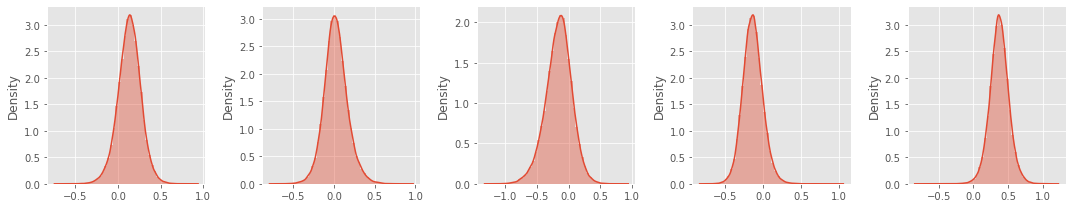

In [62]:
fig, ax=plt.subplots(1,5,figsize=(15,3))
for i in range(5):
    sns.distplot(X2[:,i],ax=ax[i])
fig.tight_layout()

In [82]:
def tsne_plot(tsne_embed, label, dim=2, alpha=.6, size=8, title=None):
    dim=tsne_embed.shape[1]
    assert(dim==2 or dim==3), 'Can only generate 2d or 3d TSNE plot'
    
    #catidx_dict={}
    #label.reset_index(drop=True, inplace=True)
    #for cat in label.unique():
    #    catidx_dict[cat]=label.loc[label==cat].index.tolist()
        
    fig, ax=plt.subplots(1,1,figsize=(10,10)) if dim==2 else plt.subplots(1,1,figsize=(12,12), subplot_kw=dict(projection='3d'))
    for cat in label.unique().tolist():
        tsne_embed_cat=tsne_embed[label==cat,:]
        if dim==2:
            ax.scatter(tsne_embed_cat[:,0], tsne_embed_cat[:,1], alpha=alpha, s=size, label=cat)
        else:
            ax.scatter(tsne_embed_cat[:,0], tsne_embed_cat[:,1], tsne_embed_cat[:,2], alpha=alpha, s=size, label=cat)
    ax.set_title(title)
    plt.legend()
    return fig

In [67]:
tsne_2d=TSNE(n_components=2, perplexity=30.0, n_iter=1000, init='pca', n_jobs=-1, random_state=123)
tsne_all_2d=tsne_2d.fit_transform(X2[:5000])

In [68]:
tsne_3d=TSNE(n_components=3, perplexity=30.0, n_iter=1000, init='pca', n_jobs=-1, random_state=123)
tsne_all_3d=tsne_3d.fit_transform(X2[:5000])

KeyboardInterrupt: 

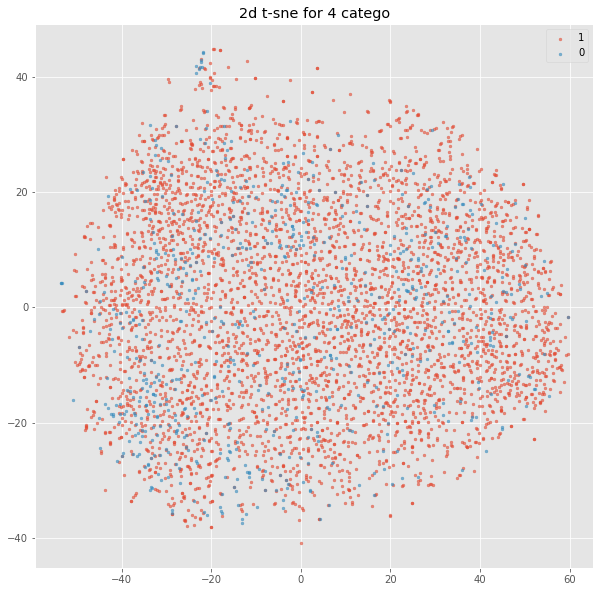

In [81]:
'''
alpha=.6
size=8
title='2d t-sne for 4 catego'
dim=2
tsne_embed=tsne_all_2d
catid=y[:5000]
fig, ax=plt.subplots(1,1,figsize=(10,10)) if dim==2 else plt.subplots(1,1,figsize=(12,12), subplot_kw=dict(projection='3d'))
for cat in catid.unique().tolist():
    tsne_embed_cat=tsne_embed[catid==cat,:]
    if dim==2:
        ax.scatter(tsne_embed_cat[:,0], tsne_embed_cat[:,1], alpha=alpha, s=size, label=cat)
    else:
        ax.scatter(tsne_embed_cat[:,0], tsne_embed_cat[:,1], tsne_embed_cat[:,2], alpha=alpha, s=size, label=cat)
ax.set_title(title)
plt.legend()
'''

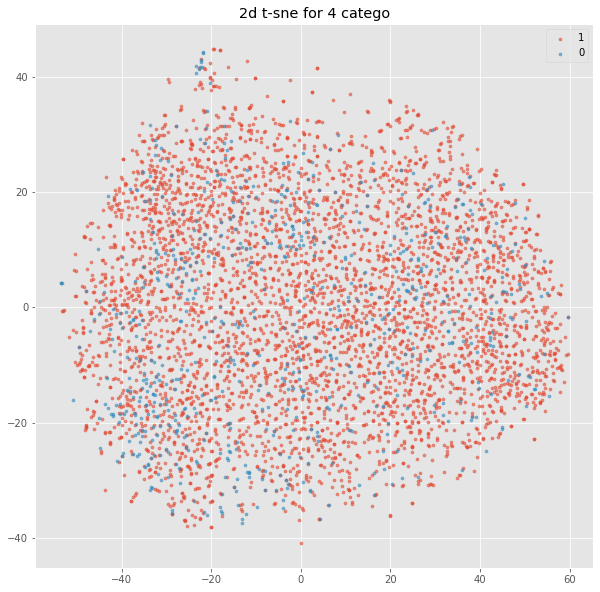

In [83]:
fig42=tsne_plot(label=y[:5000], tsne_embed=tsne_all_2d, alpha=.6, size=10, title='2d t-sne for 4 catego')
#fig32=tsne_plot(label=label_4cat, tsne_embed=tsne_  a3d, dim=3, alpha=.6, size=10, title='3d t-sne for 4 catego')

In [ ]:
# GRADED FUNCTION: Emojify_V2

def Emojify_V2(input_shape, word_to_vec_map, word_to_index):
    """
    Function creating the Emojify-v2 model's graph.
    
    Arguments:
    input_shape -- shape of the input, usually (max_len,)
    word_to_vec_map -- dictionary mapping every word in a vocabulary into its 50-dimensional vector representation
    word_to_index -- dictionary mapping from words to their indices in the vocabulary (400,001 words)

    Returns:
    model -- a model instance in Keras
    """
    
    ### START CODE HERE ###
    # Define sentence_indices as the input of the graph.
    # It should be of shape input_shape and dtype 'int32' (as it contains indices, which are integers).
    sentence_indices = Input(input_shape, dtype = 'int32')
    
    # Create the embedding layer pretrained with GloVe Vectors (≈1 line)
    embedding_layer = pretrained_embedding_layer(word_to_vec_map, word_to_index)
    
    # Propagate sentence_indices through your embedding layer
    # (See additional hints in the instructions).
    embeddings = embedding_layer(sentence_indices)   
    
    # Propagate the embeddings through an LSTM layer with 128-dimensional hidden state
    # The returned output should be a batch of sequences.
    X = LSTM(128, return_sequences = True)(embeddings)
    # Add dropout with a probability of 0.5
    X = Dropout(0.5)(X)
    # Propagate X trough another LSTM layer with 128-dimensional hidden state
    # The returned output should be a single hidden state, not a batch of sequences.
    X = LSTM(128, return_sequences = False)(X)
    # Add dropout with a probability of 0.5
    X = Dropout(0.5)(X)
    # Propagate X through a Dense layer with 5 units
    X = Dense(5)(X)
    # Add a softmax activation
    X = Activation('softmax')(X)
    
    # Create Model instance which converts sentence_indices into X.
    model = Model(inputs = sentence_indices, outputs = X)
    
    ### END CODE HERE ###
    
    return model

In [ ]:
model = Emojify_V2((maxLen,), word_to_vec_map, word_to_index)
model.summary()

## XGBoost Model

In [143]:
import time
from sklearn.model_selection import GridSearchCV
#grid search
start_time=time.time()
parameters = {'max_depth': [3,5], 
              'learning_rate': [.05,.1], 
              'n_estimators': [300,500], 
              'subsample': [.8,1],
              'reg_lambda': [0,.5]}
bst = xgb.XGBClassifier()
clf=GridSearchCV(bst, parameters, n_jobs=-1, cv=5, scoring="accuracy", verbose=0 )
clf.fit(X_train, y_train)
time_lapse=time.time()-start_time
time_lapse

KeyboardInterrupt: 

In [144]:

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42,
                                                   test_size = 0.20)
params = {'max_depth': 5, 'learning_rate': .1, 'n_estimators': 200, 
          'n_jobs': -1, 'subsample': 1, 'reg_lambda': .5, 'random_state': 101}
fit_model = xgb.XGBClassifier(**params)
fit_model.fit(X_train, y_train)

y_pred0=fit_model.predict(X_train)
print('Training accuracy:',accuracy_score(y_train,y_pred0))
y_pred=fit_model.predict(X_test)
print('Test accuracy:', accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

[01:16:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy: 0.8943452001732881
Test accuracy: 0.8719739055094032
              precision    recall  f1-score   support

           0       0.67      0.24      0.36      2856
           1       0.88      0.98      0.93     16765

    accuracy                           0.87     19621
   macro avg       0.77      0.61      0.64     19621
weighted avg       0.85      0.87      0.85     19621

[[  692  2164]
 [  348 16417]]
